Scraping Twitter Tweets

In [13]:
import tweepy
import csv
import json
import pandas as pd
import numpy as np

In [3]:
# create a dictionary to store your twitter credentials

twitter_cred = dict()

# Enter your own consumer_key, consumer_secret, access_key and access_secret
# Replacing the stars ("********")

twitter_cred['CONSUMER_KEY'] = 'AyNfe4476aIAtDsufnrHl39fd'
twitter_cred['CONSUMER_SECRET'] = 'T2gXgAFuDNW696IDZjlsAHypLiDjuOnHcPNUwcXfQsH7sTNxtD'
twitter_cred['ACCESS_KEY'] = '320204996-ZgXeu5ov5KhVYY94X04E5G2UfrnJyHIbZPlGeuXQ'
twitter_cred['ACCESS_SECRET'] = 'KWyJkadoUMAo19MrN5A3jp7vSRjkVhnzKSJtYhOxaI8ke'

# Save the information to a json so that it can be reused in code without exposing
# the secret info to public

with open('twitter_credentials.json', 'w') as secret_info:
    json.dump(twitter_cred, secret_info, indent=4, sort_keys=True)

In [4]:
# Twitter API credentials

with open('twitter_credentials.json') as cred_data:
    info = json.load(cred_data)
    consumer_key = info['CONSUMER_KEY']
    consumer_secret = info['CONSUMER_SECRET']
    access_key = info['ACCESS_KEY']
    access_secret = info['ACCESS_SECRET']


In [5]:
# Create the api endpoint

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)
#api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
limit = 8000
query=['Austin Airport OR Bergstrom']
#tweet_mode = 'extended'
tweets1_list = []
# for tweet in tweepy.Cursor(api.search, q=query).items(limit):
#     tweets_list.append(tweet)
for tweet in tweepy.Cursor(api.search,tweet_mode = 'extended',q=query).items(limit): #Put this after query in bracket#,since='2018-10-16',until='2018-10-23'
    tweets1_list.append(tweet)
#fetched_tweets = tweepy.Cursor(api.search, q=query).items(limit)

In [7]:
len(tweets1_list)

761

In [8]:
def populate_tweet_df(tweets):
#Create an empty dataframe
    df = pd.DataFrame()
    df['id'] = list(map(lambda tweet: tweet.id, tweets))
    df['full_text'] = list(map(lambda tweet: tweet.full_text, tweets))
    df['retweeted'] = list(map(lambda tweet: tweet.retweeted, tweets))
    df['place'] = list(map(lambda tweet: tweet.user.location, tweets))
    df['screen_name'] = list(map(lambda tweet: tweet.user.screen_name,tweets))
    df['verified_user'] = list(map(lambda tweet: tweet.user.verified,tweets))
    df['followers_count'] = list(map(lambda tweet: tweet.user.followers_count, tweets))
    df['friends_count'] = list(map(lambda tweet: tweet.user.friends_count,tweets))
   # df['friendship_coeff'] = list(map(lambda tweet: float(tweet.user.followers_count)/float(tweet.user.friends_count), tweets))
    return df

In [9]:
df = populate_tweet_df(tweets1_list)
print (df.head(10))

                    id                                          full_text  \
0  1060947276258979840  RT @MichaelSkolnik: Bar\nHome\nOffice\nAirport...   
1  1060933209519808513  Thank you Texas! You truly are a GREAT STATE! ...   
2  1060932035093639168  Here we go again. — traveling to Washington, D...   
3  1060930850408329217  From one family celebration 🎉 to another 💒\n🏃‍...   
4  1060926002535239680      @jessicamullen East Austin, 11th and Airport.   
5  1060925359129067522  RT @Jadehawk2131: So it’s 2am and I’m at the A...   
6  1060923141856391169  @AmericanAir horrible customer service at the ...   
7  1060917318484660224  RT @impactnews_rph: Austin-Bergstrom Internati...   
8  1060912269259915264  Austin-Bergstrom International Airport expansi...   
9  1060908336646971393  @joshduhamel I was totally respectful and didn...   

   retweeted              place     screen_name  verified_user  \
0      False    California, USA       io_austin          False   
1      False     Nap

In [10]:
df.to_csv('DatathonTwitter.csv', sep='\t', encoding='utf-8')

In [11]:
df.head

<bound method NDFrame.head of                       id                                          full_text  \
0    1060947276258979840  RT @MichaelSkolnik: Bar\nHome\nOffice\nAirport...   
1    1060933209519808513  Thank you Texas! You truly are a GREAT STATE! ...   
2    1060932035093639168  Here we go again. — traveling to Washington, D...   
3    1060930850408329217  From one family celebration 🎉 to another 💒\n🏃‍...   
4    1060926002535239680      @jessicamullen East Austin, 11th and Airport.   
5    1060925359129067522  RT @Jadehawk2131: So it’s 2am and I’m at the A...   
6    1060923141856391169  @AmericanAir horrible customer service at the ...   
7    1060917318484660224  RT @impactnews_rph: Austin-Bergstrom Internati...   
8    1060912269259915264  Austin-Bergstrom International Airport expansi...   
9    1060908336646971393  @joshduhamel I was totally respectful and didn...   
10   1060906993769160705  What a trip so far! Even though the Panthers g...   
11   10608965049346129

In [19]:
df2 = pd.read_csv('/Users/richabathija/Downloads/Datathon/DatathonTwitter.csv',sep='\t',encoding='utf-8')
df2.head()

,Unnamed: 0,id,full_text,retweeted,place,screen_name,verified_user,followers_count,friends_count
0,0,1060947276258979840,RT @MichaelSkolnik: Bar\nHome\nOffice\nAirport...,False,"California, USA",io_austin,False,258,277
1,1,1060933209519808513,Thank you Texas! You truly are a GREAT STATE! ...,False,"Naperville, IL",LorenListens2U,False,120,385
2,2,1060932035093639168,"Here we go again. — traveling to Washington, D...",False,"Texas, USA",tonyvmarty,False,1275,266
3,3,1060930850408329217,From one family celebration 🎉 to another 💒\n🏃‍...,False,"Dallas, TX",briannecmartin,False,778,1433
4,4,1060926002535239680,"@jessicamullen East Austin, 11th and Airport.",False,"Austin, Texas",toddbarnard,False,966,164


In [20]:
df2['full_text'].head()

0    RT @MichaelSkolnik: Bar\nHome\nOffice\nAirport...
1    Thank you Texas! You truly are a GREAT STATE! ...
2    Here we go again. — traveling to Washington, D...
3    From one family celebration 🎉 to another 💒\n🏃‍...
4        @jessicamullen East Austin, 11th and Airport.
Name: full_text, dtype: object

In [21]:
pd.Series(np.concatenate([x.split() for x in df2.full_text])).value_counts()

the                        478
to                         445
Austin                     420
Airport                    303
in                         300
at                         236
and                        224
a                          205
International              179
RT                         172
is                         169
of                         166
airport                    166
for                        164
I                          149
on                         108
-                          102
Bergstrom                   98
Austin,                     94
from                        89
Austin-Bergstrom            87
AUSTIN                      84
was                         82
BERGSTROM                   79
Lo:                         79
0.0                         79
Hi:                         79
Precip:                     79
Climate:                    79
Snow:                       79
                          ... 
https://t.co/slDh9Mt9o2      1
approxim

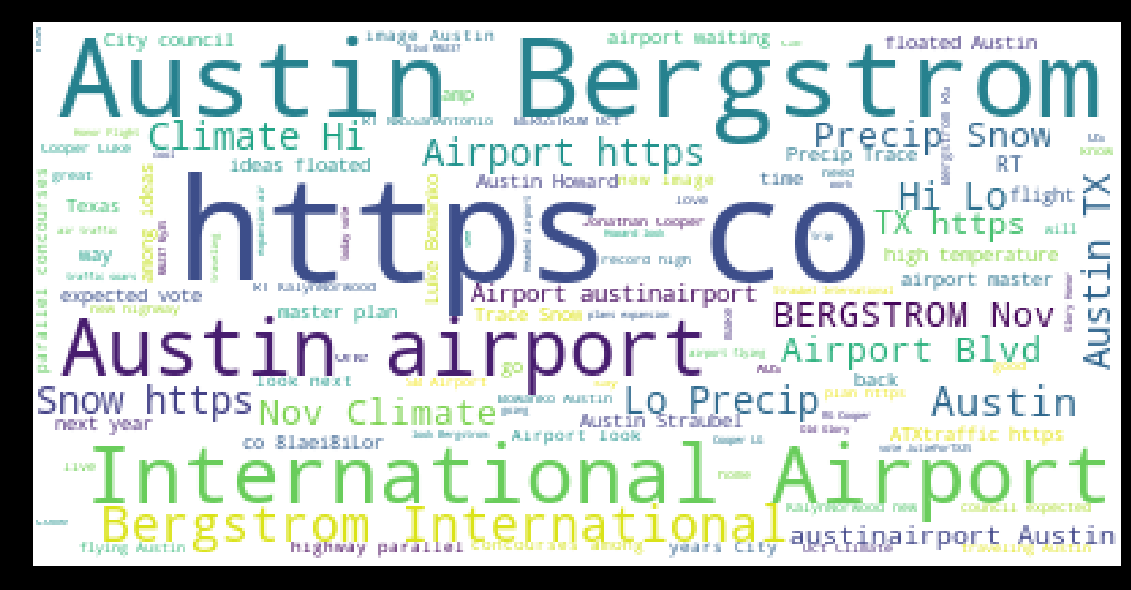

In [53]:
def wordcloud(df2,col):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2018).generate(" ".join([i for i in df2[col]]))
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Tourism insights")
wordcloud(df2,'full_text')

In [44]:
limit = 8000
query=['Airport flight experience OR Bergstrom flights OR Flight experience']
#tweet_mode = 'extended'
tweets1_list = []
# for tweet in tweepy.Cursor(api.search, q=query).items(limit):
#     tweets_list.append(tweet)
for tweet in tweepy.Cursor(api.search,tweet_mode = 'extended',q=query).items(limit): #Put this after query in bracket#,since='2018-10-16',until='2018-10-23'
    tweets1_list.append(tweet)
#fetched_tweets = tweepy.Cursor(api.search, q=query).items(limit)

In [45]:
len(tweets1_list)

186

In [46]:
def populate_tweet_df(tweets):
#Create an empty dataframe
    df = pd.DataFrame()
    df['id'] = list(map(lambda tweet: tweet.id, tweets))
    df['full_text'] = list(map(lambda tweet: tweet.full_text, tweets))
    df['retweeted'] = list(map(lambda tweet: tweet.retweeted, tweets))
    df['place'] = list(map(lambda tweet: tweet.user.location, tweets))
    df['screen_name'] = list(map(lambda tweet: tweet.user.screen_name,tweets))
    df['verified_user'] = list(map(lambda tweet: tweet.user.verified,tweets))
    df['followers_count'] = list(map(lambda tweet: tweet.user.followers_count, tweets))
    df['friends_count'] = list(map(lambda tweet: tweet.user.friends_count,tweets))
   # df['friendship_coeff'] = list(map(lambda tweet: float(tweet.user.followers_count)/float(tweet.user.friends_count), tweets))
    return df

In [47]:
df = populate_tweet_df(tweets1_list)
print (df.head(10))

                    id                                          full_text  \
0  1060854744023994375  @WestJet flight delays happen, I get it, but s...   
1  1060825046032228352  @Airport_FRA What is going on today?  Took 30 ...   
2  1060801312361795584  RT @asheshbadani: ""Our APIs on the platform h...   
3  1060765441256124416  @JifferAlderman We're disheartened to hear tha...   
4  1060714144981233664  RT @asheshbadani: ""Our APIs on the platform h...   
5  1060701687667666944  finally boarded my flight bound for Frankfurt,...   
6  1060671133509394437  @aggienole We're sorry if you feel you didn't ...   
7  1060670912746274817  Cue Alaska’s: “Hey Louie! We’re sorry to hear ...   
8  1060652763082821633  @Delta KC to MPLS DL2724 worst boarding experi...   
9  1060626329467584513  RT @asheshbadani: ""Our APIs on the platform h...   

   retweeted                       place      screen_name  verified_user  \
0      False                                     campbecw          False   


In [48]:
df.to_csv('DatathonAirport2.csv', sep='\t', encoding='utf-8')

In [49]:
df4 = pd.read_csv('/Users/richabathija/Downloads/Datathon/DatathonTwitter.csv',sep='\t',encoding='utf-8')
df4.head()

,Unnamed: 0,id,full_text,retweeted,place,screen_name,verified_user,followers_count,friends_count
0,0,1060947276258979840,RT @MichaelSkolnik: Bar\nHome\nOffice\nAirport...,False,"California, USA",io_austin,False,258,277
1,1,1060933209519808513,Thank you Texas! You truly are a GREAT STATE! ...,False,"Naperville, IL",LorenListens2U,False,120,385
2,2,1060932035093639168,"Here we go again. — traveling to Washington, D...",False,"Texas, USA",tonyvmarty,False,1275,266
3,3,1060930850408329217,From one family celebration 🎉 to another 💒\n🏃‍...,False,"Dallas, TX",briannecmartin,False,778,1433
4,4,1060926002535239680,"@jessicamullen East Austin, 11th and Airport.",False,"Austin, Texas",toddbarnard,False,966,164


In [50]:
df4['full_text'].head()

0    RT @MichaelSkolnik: Bar\nHome\nOffice\nAirport...
1    Thank you Texas! You truly are a GREAT STATE! ...
2    Here we go again. — traveling to Washington, D...
3    From one family celebration 🎉 to another 💒\n🏃‍...
4        @jessicamullen East Austin, 11th and Airport.
Name: full_text, dtype: object

In [51]:
pd.Series(np.concatenate([x.split() for x in df4.full_text])).value_counts()

the                        478
to                         445
Austin                     420
Airport                    303
in                         300
at                         236
and                        224
a                          205
International              179
RT                         172
is                         169
of                         166
airport                    166
for                        164
I                          149
on                         108
-                          102
Bergstrom                   98
Austin,                     94
from                        89
Austin-Bergstrom            87
AUSTIN                      84
was                         82
BERGSTROM                   79
Lo:                         79
0.0                         79
Hi:                         79
Precip:                     79
Climate:                    79
Snow:                       79
                          ... 
https://t.co/slDh9Mt9o2      1
approxim

In [25]:
limit = 8000
query=['Austin tourism OR Austin Tourists OR Austin Food']
#tweet_mode = 'extended'
tweets1_list = []
# for tweet in tweepy.Cursor(api.search, q=query).items(limit):
#     tweets_list.append(tweet)
for tweet in tweepy.Cursor(api.search,tweet_mode = 'extended',q=query).items(limit): #Put this after query in bracket#,since='2018-10-16',until='2018-10-23'
    tweets1_list.append(tweet)
#fetched_tweets = tweepy.Cursor(api.search, q=query).items(limit)

In [26]:
len(tweets1_list)

2735

In [27]:
def populate_tweet_df(tweets):
#Create an empty dataframe
    df = pd.DataFrame()
    df['id'] = list(map(lambda tweet: tweet.id, tweets))
    df['full_text'] = list(map(lambda tweet: tweet.full_text, tweets))
    df['retweeted'] = list(map(lambda tweet: tweet.retweeted, tweets))
    df['place'] = list(map(lambda tweet: tweet.user.location, tweets))
    df['screen_name'] = list(map(lambda tweet: tweet.user.screen_name,tweets))
    df['verified_user'] = list(map(lambda tweet: tweet.user.verified,tweets))
    df['followers_count'] = list(map(lambda tweet: tweet.user.followers_count, tweets))
    df['friends_count'] = list(map(lambda tweet: tweet.user.friends_count,tweets))
   # df['friendship_coeff'] = list(map(lambda tweet: float(tweet.user.followers_count)/float(tweet.user.friends_count), tweets))
    return df

In [28]:
df = populate_tweet_df(tweets1_list)
print (df.head(10))

                    id                                          full_text  \
0  1060970474585407496  The sparkling wine denomination from #Trentino...   
1  1060968291424985088  Join us on Friday November 16th for a Customer...   
2  1060968277600546817  @HeathTHall got time to talk today? Want to se...   
3  1060967440660787201  The Queen Beak from Bird Bird Biscuit in Austi...   
4  1060967334922346503  Austin walked across the street and brought me...   
5  1060965981735006220  Seating in small Mexican restaurant in Austin,...   
6  1060962838657806336  The Austin Art Gallery is bringing together th...   
7  1060962801999642627  A Jewish Food Truck In Austin Was Vandalized, ...   
8  1060962659330351105  Today (Friday) selling my goods at the best wo...   
9  1060961163201044480  RT @maqanmy: Harini tekak admin rasa nak makan...   

   retweeted            place     screen_name  verified_user  followers_count  \
0      False           Trento       trentodoc          False           

In [29]:
df.to_csv('DatathonTourist.csv', sep='\t', encoding='utf-8')

In [30]:
df3 = pd.read_csv('/Users/richabathija/Downloads/Datathon/DatathonTourist.csv',sep='\t',encoding='utf-8')
df3.head()

,Unnamed: 0,id,full_text,retweeted,place,screen_name,verified_user,followers_count,friends_count
0,0,1060970474585407496,The sparkling wine denomination from #Trentino...,False,Trento,trentodoc,False,4593,577
1,1,1060968291424985088,Join us on Friday November 16th for a Customer...,False,"Waco, TX",SRTkleanup,False,727,1011
2,2,1060968277600546817,@HeathTHall got time to talk today? Want to se...,False,NaN,sauceodyssey,False,6,9
3,3,1060967440660787201,The Queen Beak from Bird Bird Biscuit in Austi...,False,NaN,foodtwitts,False,30,0
4,4,1060967334922346503,Austin walked across the street and brought me...,False,NaN,briannnnnna_x3,False,87,76


In [31]:
df3['full_text'].head()

0    The sparkling wine denomination from #Trentino...
1    Join us on Friday November 16th for a Customer...
2    @HeathTHall got time to talk today? Want to se...
3    The Queen Beak from Bird Bird Biscuit in Austi...
4    Austin walked across the street and brought me...
Name: full_text, dtype: object

In [34]:
x = pd.Series(np.concatenate([x.split() for x in df3.full_text])).value_counts()
x

to                         2912
His                        2172
and                        2070
RT                         1806
Food                       1326
The                        1193
This                       1126
Your                       1097
Support                    1090
He                         1090
Them                       1088
Allowance                  1086
Uses                       1086
Feed                       1086
4-Year-Old                 1086
Homeless.                  1086
Give                       1086
Love,                      1085
Raise                      1085
Hand                       1085
@kwilli1046:               1084
Austin!…                   1084
the                         907
food                        891
Austin                      801
in                          757
a                           491
of                          377
for                         369
is                          308
                           ... 
GEN     

In [39]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

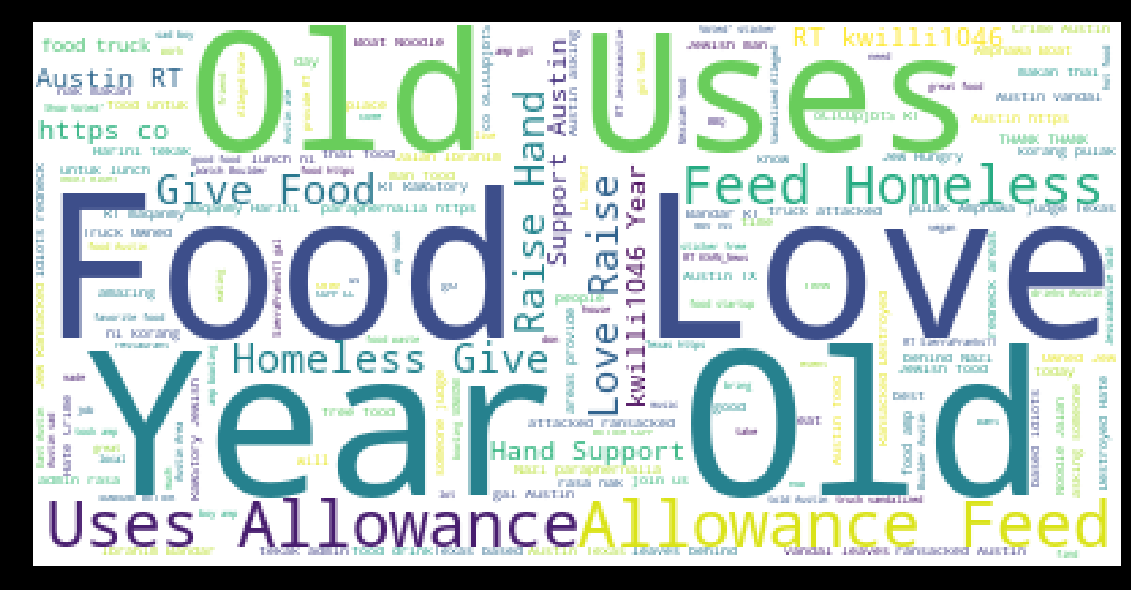

In [40]:
def wordcloud(df3,col):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2018).generate(" ".join([i for i in df3[col]]))
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Tourism insights")
wordcloud(df3,'full_text')